In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import xgboost

In [2]:
# Load the data

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
#Get information about the data

In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [7]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [9]:
print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (614, 13)
Test data shape:  (367, 12)


In [10]:
#Checking for missing values

In [11]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

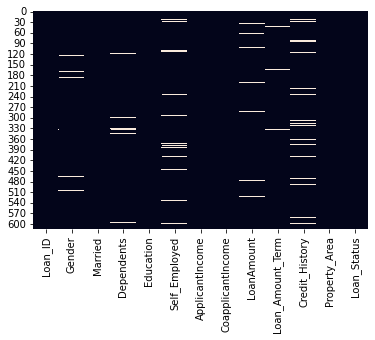

In [12]:
sns.heatmap(train.isnull(),cbar=False)

In [13]:
# percentage distribution for categorical values

In [14]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

[Text(0, 0.5, '')]

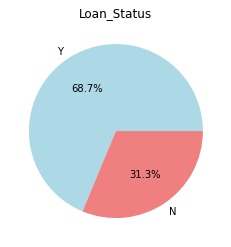

In [15]:
train["Loan_Status"].value_counts(normalize=True).plot.pie(title = 'Loan_Status',autopct="%1.1f%%",colors=['lightblue', 'lightcoral'],ylabel=False).set(ylabel=None)

In [16]:
train["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

[Text(0, 0.5, '')]

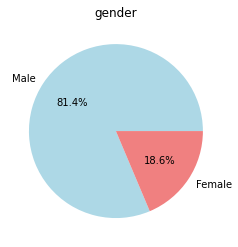

In [17]:
train["Gender"].value_counts(normalize=True).plot.pie(title = 'gender',colors=['lightblue', 'lightcoral',],autopct="%1.1f%%").set(ylabel=None)

In [18]:
train["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

<AxesSubplot:title={'center':'married'}, ylabel='Married'>

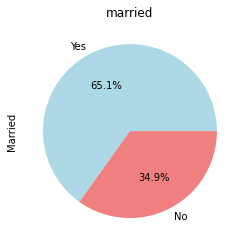

In [19]:
train["Married"].value_counts(normalize=True).plot.pie(title = 'married',colors=['lightblue', 'lightcoral',],autopct="%1.1f%%")

In [20]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

[Text(0, 0.5, '')]

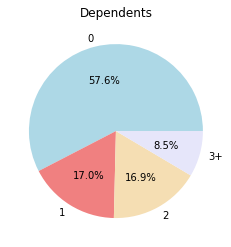

In [21]:
train["Dependents"].value_counts(normalize=True).plot.pie(title = 'Dependents',colors=['lightblue', 'lightcoral','wheat','lavender'],autopct="%1.1f%%").set(ylabel=None)

In [22]:
train["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

[Text(0, 0.5, '')]

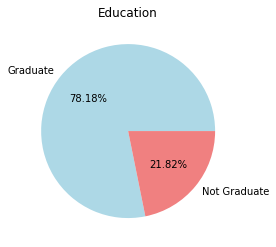

In [23]:
train["Education"].value_counts(normalize=True).plot.pie(title = 'Education',colors=['lightblue', 'lightcoral',],autopct="%1.2f%%").set(ylabel=None)

In [24]:
train["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

[Text(0, 0.5, '')]

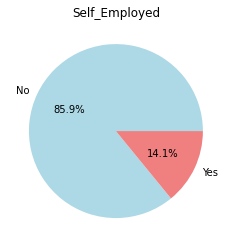

In [25]:
train["Self_Employed"].value_counts(normalize=True).plot.pie(title = 'Self_Employed',colors=['lightblue', 'lightcoral',],autopct="%1.1f%%").set(ylabel=None)

In [26]:
train["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

[Text(0, 0.5, '')]

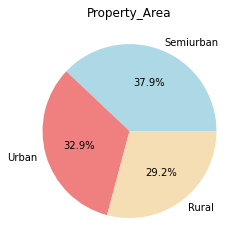

In [27]:
train["Property_Area"].value_counts(normalize=True).plot.pie(title = 'Property_Area',colors=['lightblue', 'lightcoral','wheat',],autopct="%1.1f%%").set(ylabel=None)

In [28]:
train["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

[Text(0, 0.5, '')]

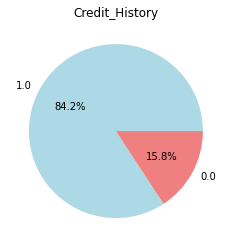

In [29]:
train["Credit_History"].value_counts(normalize=True).plot.pie(title = 'Credit_History',colors=['lightblue', 'lightcoral'],autopct="%1.1f%%").set(ylabel=None)

In [30]:
# Checking the distribution for numerical values

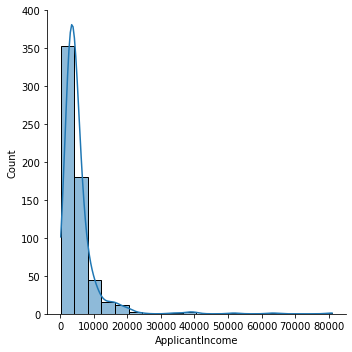

In [31]:

sns.displot(train.ApplicantIncome,kde=True,bins=20)

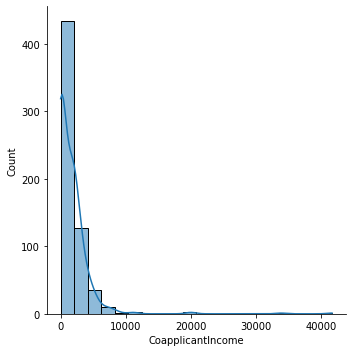

In [32]:
sns.displot(train.CoapplicantIncome ,kde=True,bins=20)

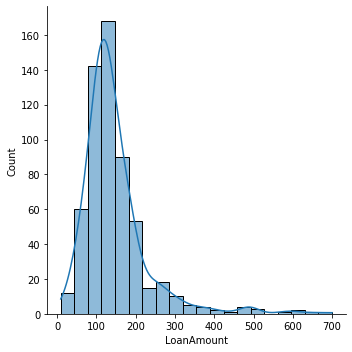

In [33]:
sns.displot(train.LoanAmount  ,kde=True,bins=20)

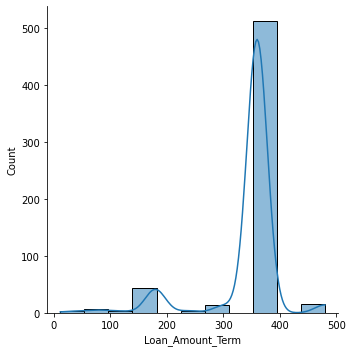

In [34]:
sns.displot(train.Loan_Amount_Term,kde=True)

In [35]:
# Before we create a correlation matrix we first have to convert the categorical values to numeric in order to see a full matrix
# but before that we also have to clean the data because the encode will transform the missing value as 0

In [36]:
#Clean the data
#categoricall
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train['Dependents'].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)
#numerical
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [37]:
#Clean the data
#categoricall
test["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
test["Married"].fillna(train["Married"].mode()[0],inplace=True)
test['Dependents'].fillna(train["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
test["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)
#numerical
test["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)
test["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [38]:
train_clean=train.copy()
test_clean=test.copy()


In [39]:
train_clean

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [40]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

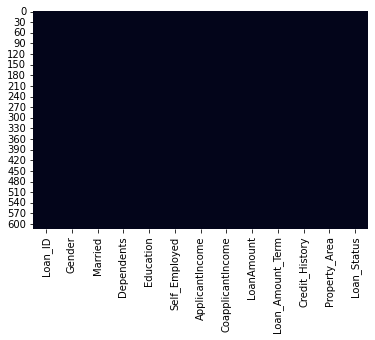

In [41]:
sns.heatmap(train.isnull(),cbar=False)

In [42]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [43]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [44]:
# Transform the categorical values to numeric values
categorical_features=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_features:
    train[i]=le.fit_transform(train[i])

In [45]:
categorical_features=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_features:
    test[i]=le.fit_transform(test[i])

<AxesSubplot:>

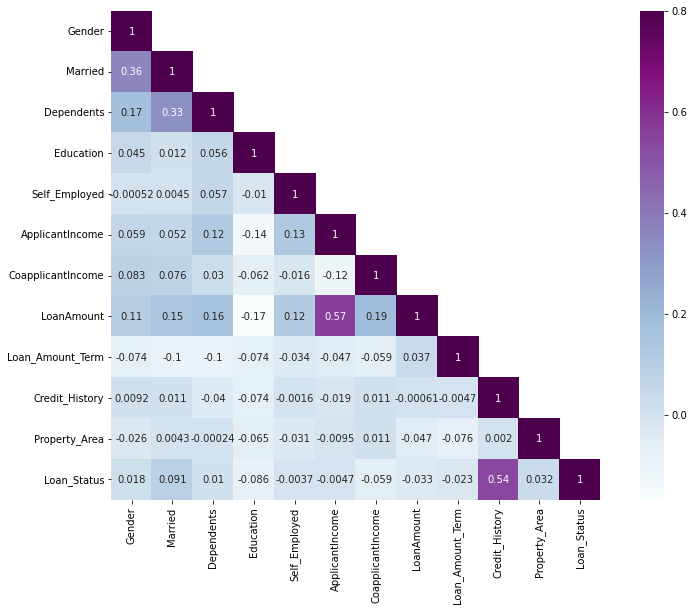

In [46]:
#After we build the matrix (lower triangle of it) we can see there is a moderate correlation between 
#Loan Amount and Applicant Income
#Also for Credit history and Loan Status (target value)
#the rest of the numbers are to low to consider
corr_train=train.corr()
corr_train.to_markdown()
lower_triang=corr_train.where(np.tril(np.ones(corr_train.shape)).astype(np.bool))
plt.subplots(figsize=(14,9))
sns.heatmap(lower_triang,vmax=.8, square=True, cmap="BuPu",annot=True)

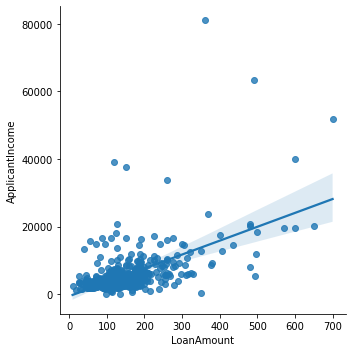

In [47]:
# if we plot the scatter plot we kind off see a positive correlation
sns.lmplot(x="LoanAmount",y="ApplicantIncome",data=train)

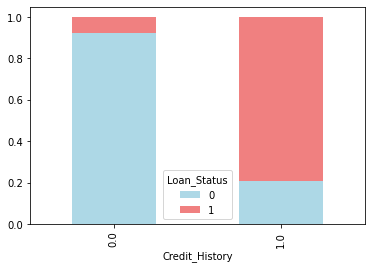

In [48]:
# if we plot the crosstab between credit history an loan status we can se that the credit history
# is an important decision factor for the  target value

credit_history=pd.crosstab(train['Credit_History'],train['Loan_Status'])
credit_history.div(credit_history.sum(axis=1),axis=0).plot(kind='bar',stacked=True,color=['lightblue', 'lightcoral'])
plt.show()

In [49]:
#without normalization of the dataset

In [50]:
train=train.drop("Loan_ID",axis=1)
test=test.drop("Loan_ID",axis=1)

In [51]:
#we separete the target variable (Sklearn requires the target variable in a separate dataset)

In [52]:
X=train.drop("Loan_Status",1)
y=train[["Loan_Status"]]

In [53]:
# we display the importance of features

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=100)
etc.fit(X,y.values.ravel())
values=pd.Series(etc.feature_importances_)

<AxesSubplot:>

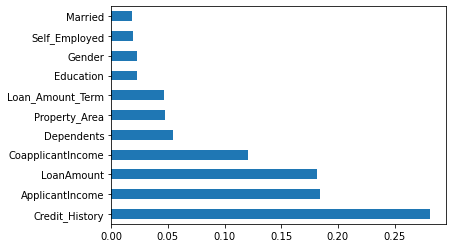

In [55]:
values.index=X.columns
values.sort_values(ascending=False).plot(kind='barh')

In [56]:
#model creation
#importing acuracy and f1_score(is a measure of a model's accuracy on a datase,a way of combining the precision and recall of the model)

In [57]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score

In [58]:
accuracy=[]
f1=[]
model=[]

In [59]:
#training  data split 

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.25,random_state=42)
x_train.shape,y_train.shape,x_val.shape,y_val.shape

((460, 11), (460, 1), (154, 11), (154, 1))

In [61]:
#logistic Regresion

In [62]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train.values.ravel())
y_hat=lr.predict(x_val)


In [63]:
accuracy.append(np.round(accuracy_score(y_val,y_hat),2))
f1.append(np.round(f1_score(y_val,y_hat,average='weighted'),2))
model.append('Logistic Regression')

In [64]:
#Suport vector Machine

In [65]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train.values.ravel())
y_hat=svc.predict(x_val)

In [66]:
accuracy.append(np.round(accuracy_score(y_val,y_hat),2))
f1.append(np.round(f1_score(y_val,y_hat,average='weighted'),2))
model.append('SVC')

In [67]:
#Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train.values.ravel())
y_hat=rfc.predict(x_val)

In [69]:
accuracy.append(np.round(accuracy_score(y_val,y_hat),2))
f1.append(np.round(f1_score(y_val,y_hat,average='weighted'),2))
model.append('Random Forest')


In [70]:
#Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
dst=DecisionTreeClassifier(criterion='entropy')
dst.fit(x_train,y_train.values.ravel())
y_hat=dst.predict(x_val)

In [72]:
accuracy.append(np.round(accuracy_score(y_val,y_hat),2))
f1.append(np.round(f1_score(y_val,y_hat,average='weighted'),2))
model.append('Decision Tree')

In [73]:
#XGB Clasifier

In [74]:
from xgboost import XGBClassifier
xgb=XGBClassifier(use_label_encoder =False,eval_metric='mlogloss')
xgb.fit(x_train,y_train.values.ravel())
y_hat=dst.predict(x_val)

In [75]:
accuracy.append(np.round(accuracy_score(y_val,y_hat),2))
f1.append(np.round(f1_score(y_val,y_hat,average='weighted'),2))
model.append('XGBClassifier')

In [76]:
output=pd.DataFrame({'Model':model,
                    'Accuracy':accuracy,
                    'F1 score':f1})
output

,Model,Accuracy,F1 score
0,Logistic Regression,0.77,0.74
1,SVC,0.65,0.51
2,Random Forest,0.79,0.77
3,Decision Tree,0.69,0.68
4,XGBClassifier,0.69,0.68


In [77]:
#with normalization of the dataset

In [78]:
from sklearn.preprocessing import StandardScaler
X_norm=StandardScaler().fit_transform(X)


In [79]:
accuracy_N=[]
f1_N=[]
model_N=[]

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_norm,y,test_size=0.25,random_state=42)
x_train.shape,y_train.shape,x_val.shape,y_val.shape

((460, 11), (460, 1), (154, 11), (154, 1))

In [81]:
#Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train.values.ravel())
y_hat=lr.predict(x_val)


In [83]:
accuracy_N.append(np.round(accuracy_score(y_val,y_hat),2))
f1_N.append(np.round(f1_score(y_val,y_hat,average='weighted'),2))
model_N.append('Logistic Regression')

In [84]:
#Suport vector machine

In [85]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train.values.ravel())
y_hat=svc.predict(x_val)

In [86]:
accuracy_N.append(np.round(accuracy_score(y_val,y_hat),2))
f1_N.append(np.round(f1_score(y_val,y_hat,average='weighted'),2))
model_N.append('SVC')

In [87]:
#Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train.values.ravel())
y_hat=rfc.predict(x_val)

In [89]:
accuracy_N.append(np.round(accuracy_score(y_val,y_hat),2))
f1_N.append(np.round(f1_score(y_val,y_hat,average='weighted'),2))
model_N.append('Random Forest')

In [90]:
#Decision Tree Classifier

In [91]:
from sklearn.tree import DecisionTreeClassifier
dst=DecisionTreeClassifier(criterion='entropy')
dst.fit(x_train,y_train.values.ravel())
y_hat=dst.predict(x_val)

In [92]:
accuracy_N.append(np.round(accuracy_score(y_val,y_hat),2))
f1_N.append(np.round(f1_score(y_val,y_hat,average='weighted'),2))
model_N.append('Decision Tree')

In [93]:
#XGB Clasifier

In [94]:
from xgboost import XGBClassifier
xgb=XGBClassifier(use_label_encoder =False,eval_metric='mlogloss')
xgb.fit(x_train,y_train.values.ravel())
y_hat=xgb.predict(x_val)

In [95]:
accuracy_N.append(np.round(accuracy_score(y_val,y_hat),2))
f1_N.append(np.round(f1_score(y_val,y_hat,average='weighted'),2))
model_N.append('XGBClassifier')

In [96]:
#With normalization 

In [97]:
output=pd.DataFrame({'Model':model_N,
                    'Accuracy':accuracy_N,
                    'F1 score':f1_N})
output


,Model,Accuracy,F1 score
0,Logistic Regression,0.77,0.74
1,SVC,0.79,0.76
2,Random Forest,0.77,0.74
3,Decision Tree,0.69,0.68
4,XGBClassifier,0.76,0.75


In [98]:
# without normalization

In [99]:
output=pd.DataFrame({'Model':model,
                    'Accuracy':accuracy,
                    'F1 score':f1})
output

,Model,Accuracy,F1 score
0,Logistic Regression,0.77,0.74
1,SVC,0.65,0.51
2,Random Forest,0.79,0.77
3,Decision Tree,0.69,0.68
4,XGBClassifier,0.69,0.68


In [100]:
#Parameter tunnig for SVC using GridSearchCV

In [101]:
from sklearn.model_selection import GridSearchCV


In [102]:

from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': ['scale'],
              'kernel': ['rbf', 'sigmoid']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2,cv=5)
 
# fitting the model for grid search
grid.fit(x_train, y_train.values.ravel())


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': ['scale'],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=2)

In [103]:
# print best score
print(grid.best_score_)

# print  model  after parameter tuning
print(grid.best_estimator_)


0.8217391304347826
SVC(C=0.1, kernel='sigmoid')


In [104]:
# grid prediction (SVC with parameter tunning)
grid_predictions = grid.predict(x_val)

In [112]:
print(classification_report(y_val, grid_predictions))
y_pred=grid_predictions

              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



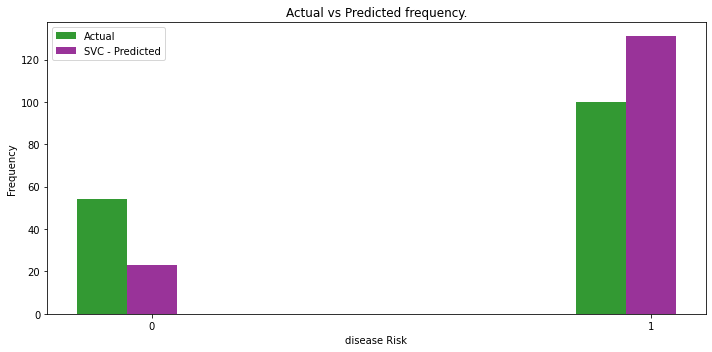

In [120]:
uniqueValues, occurCount = np.unique(y_val, return_counts=True)
frequency_actual = (occurCount[0],occurCount[1])

uniqueValues, occurCount = np.unique(y_pred, return_counts=True)
frequency_predicted_svc = (occurCount[0],occurCount[1])

n_groups = 2
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, frequency_actual, bar_width,
alpha=opacity,
color='g',
label='Actual')

rects6 = plt.bar(index + bar_width, frequency_predicted_rfc, bar_width,
alpha=opacity,
color='purple',
label='SVC - Predicted')

plt.xlabel('disease Risk')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted frequency.')
plt.xticks(index + bar_width, ('0', '1'))
plt.legend()

plt.tight_layout()
plt.show()

In [127]:
# svc prediction (SVC without parameter tunning)

svc_prediction = svc.predict(x_val)

In [128]:
print(classification_report(y_val, svc_prediction))
y_pred=grid_predictions

              precision    recall  f1-score   support

           0       0.96      0.41      0.57        54
           1       0.76      0.99      0.86       100

    accuracy                           0.79       154
   macro avg       0.86      0.70      0.71       154
weighted avg       0.83      0.79      0.76       154



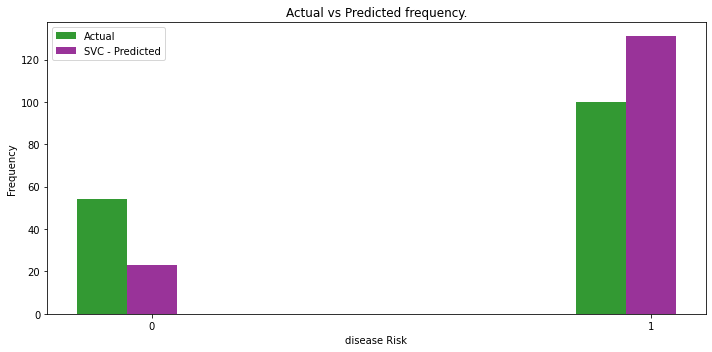

In [129]:
uniqueValues, occurCount = np.unique(y_val, return_counts=True)
frequency_actual = (occurCount[0],occurCount[1])

uniqueValues, occurCount = np.unique(y_pred, return_counts=True)
frequency_predicted_svc = (occurCount[0],occurCount[1])

n_groups = 2
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, frequency_actual, bar_width,
alpha=opacity,
color='g',
label='Actual')

rects6 = plt.bar(index + bar_width, frequency_predicted_rfc, bar_width,
alpha=opacity,
color='purple',
label='SVC - Predicted')

plt.xlabel('disease Risk')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted frequency.')
plt.xticks(index + bar_width, ('0', '1'))
plt.legend()

plt.tight_layout()
plt.show()